In [1]:
import string
import warnings
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

warnings.filterwarnings("ignore")
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
features = pd.read_excel(r"final_features.xlsx")
target = pd.read_excel(r"final_data.xlsx")

In [3]:
X = features.values
y = target['logVDss'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

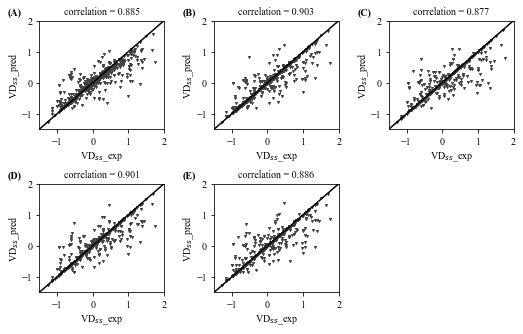

In [4]:
# train models
model_list = [RandomForestRegressor(n_estimators=294, random_state=42).fit(X_train, y_train),
              lgb.LGBMRegressor(learning_rate=0.07, n_estimators=299, random_state=42).fit(X_train, y_train),
              SVR(C=16, degree=1, epsilon=0.001, gamma=0.013).fit(X_train, y_train),
              XGBR(n_estimators=295, learning_rate=0.1, random_state=42).fit(X_train, y_train),
              GPR(kernel=Matern(length_scale=0.484, nu=1.5) + WhiteKernel(noise_level=1e-05), random_state=42).fit(
                  X_train, y_train)
              ]
number_list = ['(A)', '(B)', '(C)', '(D)', '(E)']

plt.figure(figsize=(8.5, 5))
# parameter assignment
font = {'family': 'Times New Roman',
        'size': 10}
labelsize = 10
x_coordinate = -0.25
y_coordinate = 1.05
wspace = 0.4
hspace = 0.5

# draw the scatter plot of each model
for i, model, number in zip(range(1, 6), model_list, number_list):
    ax = plt.subplot(2, 3, i)
    # calculate the predicted value
    y_pred = model.predict(X_test)
    # draw the scatter plot of predict and experimental values
    ax.scatter(y_test, y_pred, color='0.25', s=4, marker="v")
    # add line y=x
    ax.plot([-1.5, 2], [-1.5, 2], color='0', linewidth=1.5)
    # set the labels and font size of the x and y axes
    ax.set_xlabel('VD$_{ss}$_exp', font)
    ax.set_ylabel('VD$_{ss}$_pred', font, labelpad=0)
    # set the ranges of y and x
    plt.ylim(-1.5, 2)
    plt.xlim(-1.5, 2)
    # calculate correlation
    plt.title('correlation = {:.3f}'.format(np.corrcoef(y_test, y_pred)[0][1]), font)
    # set tick label font size
    plt.tick_params(labelsize=labelsize)
    # set the font of the x-axis and y-axis tick values
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    # add numbers to figures
    ax.text(x_coordinate, y_coordinate, number, transform=ax.transAxes, size=10,
            family='Times New Roman', weight='bold')

#  set the spacing between graphs
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.savefig("fig5.tiff", bbox_inches='tight', dpi=300)
plt.show()